In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
ds_total_x=pd.read_csv('net_dataset_x.csv')
ds_total_y=pd.read_csv('net_dataset_y.csv')

In [3]:

ds_total_x=ds_total_x.drop('Unnamed: 0',axis=1)
ds_total_y=ds_total_y.drop('Unnamed: 0',axis=1)

In [4]:

total_x=ds_total_x.to_numpy(dtype='float32')
total_y=ds_total_y.to_numpy(dtype='float32')
     

In [5]:
train_x,test_x,train_y,test_y=train_test_split(total_x,total_y,test_size=0.15,random_state=False)


In [6]:

train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
test_x = test_x.reshape((test_x.shape[0], test_x.shape[1], 1))

In [7]:
num_classes = len(np.unique(train_y))

In [8]:
print(num_classes)


31


In [9]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=32, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    conv4 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv3)
    conv4 = keras.layers.BatchNormalization()(conv4)
    conv4 = keras.layers.ReLU()(conv4)

    conv5 = keras.layers.Conv1D(filters=128, kernel_size=3, padding="same")(conv4)
    conv5 = keras.layers.BatchNormalization()(conv5)
    conv5 = keras.layers.ReLU()(conv5)

    conv6 = keras.layers.Conv1D(filters=128, kernel_size=3, padding="same")(conv5)
    conv6 = keras.layers.BatchNormalization()(conv6)
    conv6 = keras.layers.ReLU()(conv6)

    conv7 = keras.layers.Conv1D(filters=128, kernel_size=3, padding="same")(conv6)
    conv7 = keras.layers.BatchNormalization()(conv7)
    conv7 = keras.layers.ReLU()(conv7)

    # conv8 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv7)
    # conv8 = keras.layers.BatchNormalization()(conv8)
    # conv8 = keras.layers.ReLU()(conv8)

    # conv9 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv8)
    # conv9 = keras.layers.BatchNormalization()(conv9)
    # conv9 = keras.layers.ReLU()(conv9)

    gap = keras.layers.GlobalAveragePooling1D()(conv7)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=train_x.shape[1:])
#keras.utils.plot_model(model, show_shapes=True)
     


In [10]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model_local_1.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    train_x,
    train_y,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.15,
    verbose=1,
)

Epoch 1/500
6550/6550 [==============================] - 44s 7ms/step - loss: 0.9841 - sparse_categorical_accuracy: 0.6199 - val_loss: 0.9968 - val_sparse_categorical_accuracy: 0.6173
Epoch 2/500
6550/6550 [==============================] - 47s 7ms/step - loss: 0.6829 - sparse_categorical_accuracy: 0.7226 - val_loss: 0.5880 - val_sparse_categorical_accuracy: 0.7535
Epoch 3/500
6550/6550 [==============================] - 47s 7ms/step - loss: 0.6049 - sparse_categorical_accuracy: 0.7526 - val_loss: 0.4924 - val_sparse_categorical_accuracy: 0.7981
Epoch 4/500
6550/6550 [==============================] - 48s 7ms/step - loss: 0.5564 - sparse_categorical_accuracy: 0.7714 - val_loss: 0.4920 - val_sparse_categorical_accuracy: 0.7946
Epoch 5/500
6550/6550 [==============================] - 48s 7ms/step - loss: 0.5323 - sparse_categorical_accuracy: 0.7803 - val_loss: 0.4537 - val_sparse_categorical_accuracy: 0.8153
Epoch 6/500
6550/6550 [==============================] - 48s 7ms/step - loss: 0.

6550/6550 [==============================] - 42s 6ms/step - loss: 0.3639 - sparse_categorical_accuracy: 0.8503 - val_loss: 0.3538 - val_sparse_categorical_accuracy: 0.8530
Epoch 46/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.3644 - sparse_categorical_accuracy: 0.8496 - val_loss: 0.3729 - val_sparse_categorical_accuracy: 0.8453
Epoch 47/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.3617 - sparse_categorical_accuracy: 0.8515 - val_loss: 0.3677 - val_sparse_categorical_accuracy: 0.8438
Epoch 48/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.3617 - sparse_categorical_accuracy: 0.8507 - val_loss: 0.3355 - val_sparse_categorical_accuracy: 0.8628
Epoch 49/500
6550/6550 [==============================] - 46s 7ms/step - loss: 0.3604 - sparse_categorical_accuracy: 0.8517 - val_loss: 0.3382 - val_sparse_categorical_accuracy: 0.8604
Epoch 50/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.3606 - 

6550/6550 [==============================] - 43s 7ms/step - loss: 0.3119 - sparse_categorical_accuracy: 0.8713 - val_loss: 0.3069 - val_sparse_categorical_accuracy: 0.8742
Epoch 90/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.3122 - sparse_categorical_accuracy: 0.8719 - val_loss: 0.3062 - val_sparse_categorical_accuracy: 0.8762
Epoch 91/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.3127 - sparse_categorical_accuracy: 0.8714 - val_loss: 0.3010 - val_sparse_categorical_accuracy: 0.8783
Epoch 92/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.3123 - sparse_categorical_accuracy: 0.8718 - val_loss: 0.2967 - val_sparse_categorical_accuracy: 0.8812
Epoch 93/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.3119 - sparse_categorical_accuracy: 0.8716 - val_loss: 0.3136 - val_sparse_categorical_accuracy: 0.8729
Epoch 94/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.3116 - 

6550/6550 [==============================] - 45s 7ms/step - loss: 0.2920 - sparse_categorical_accuracy: 0.8803 - val_loss: 0.2960 - val_sparse_categorical_accuracy: 0.8815
Epoch 134/500
6550/6550 [==============================] - 43s 7ms/step - loss: 0.2919 - sparse_categorical_accuracy: 0.8796 - val_loss: 0.2881 - val_sparse_categorical_accuracy: 0.8836
Epoch 135/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.2910 - sparse_categorical_accuracy: 0.8802 - val_loss: 0.2874 - val_sparse_categorical_accuracy: 0.8842
Epoch 136/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.2915 - sparse_categorical_accuracy: 0.8805 - val_loss: 0.3021 - val_sparse_categorical_accuracy: 0.8775
Epoch 137/500
6550/6550 [==============================] - 43s 6ms/step - loss: 0.2917 - sparse_categorical_accuracy: 0.8799 - val_loss: 0.2865 - val_sparse_categorical_accuracy: 0.8846
Epoch 138/500
6550/6550 [==============================] - 43s 6ms/step - loss: 0.29

6550/6550 [==============================] - 42s 6ms/step - loss: 0.2821 - sparse_categorical_accuracy: 0.8843 - val_loss: 0.2780 - val_sparse_categorical_accuracy: 0.8889
Epoch 178/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.2813 - sparse_categorical_accuracy: 0.8845 - val_loss: 0.2826 - val_sparse_categorical_accuracy: 0.8862
Epoch 179/500
6550/6550 [==============================] - 43s 7ms/step - loss: 0.2812 - sparse_categorical_accuracy: 0.8845 - val_loss: 0.2810 - val_sparse_categorical_accuracy: 0.8877
Epoch 180/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.2815 - sparse_categorical_accuracy: 0.8839 - val_loss: 0.2811 - val_sparse_categorical_accuracy: 0.8859
Epoch 181/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.2821 - sparse_categorical_accuracy: 0.8846 - val_loss: 0.2798 - val_sparse_categorical_accuracy: 0.8879
Epoch 182/500
6550/6550 [==============================] - 43s 6ms/step - loss: 0.28

6550/6550 [==============================] - 42s 6ms/step - loss: 0.2788 - sparse_categorical_accuracy: 0.8851 - val_loss: 0.2771 - val_sparse_categorical_accuracy: 0.8890
Epoch 222/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.2790 - sparse_categorical_accuracy: 0.8853 - val_loss: 0.2764 - val_sparse_categorical_accuracy: 0.8888
Epoch 223/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.2788 - sparse_categorical_accuracy: 0.8854 - val_loss: 0.2787 - val_sparse_categorical_accuracy: 0.8880
Epoch 224/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.2785 - sparse_categorical_accuracy: 0.8857 - val_loss: 0.2770 - val_sparse_categorical_accuracy: 0.8888
Epoch 225/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.2776 - sparse_categorical_accuracy: 0.8862 - val_loss: 0.2784 - val_sparse_categorical_accuracy: 0.8874
Epoch 226/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.27

6550/6550 [==============================] - 42s 6ms/step - loss: 0.2779 - sparse_categorical_accuracy: 0.8852 - val_loss: 0.2770 - val_sparse_categorical_accuracy: 0.8883
Epoch 266/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.2781 - sparse_categorical_accuracy: 0.8854 - val_loss: 0.2833 - val_sparse_categorical_accuracy: 0.8854
Epoch 267/500
6550/6550 [==============================] - 43s 7ms/step - loss: 0.2779 - sparse_categorical_accuracy: 0.8854 - val_loss: 0.2792 - val_sparse_categorical_accuracy: 0.8877
Epoch 268/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.2776 - sparse_categorical_accuracy: 0.8863 - val_loss: 0.2772 - val_sparse_categorical_accuracy: 0.8901
Epoch 269/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.2774 - sparse_categorical_accuracy: 0.8859 - val_loss: 0.2799 - val_sparse_categorical_accuracy: 0.8885
Epoch 270/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.27

6550/6550 [==============================] - 43s 7ms/step - loss: 0.2773 - sparse_categorical_accuracy: 0.8857 - val_loss: 0.2760 - val_sparse_categorical_accuracy: 0.8890
Epoch 310/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.2769 - sparse_categorical_accuracy: 0.8856 - val_loss: 0.2810 - val_sparse_categorical_accuracy: 0.8872
Epoch 311/500
6550/6550 [==============================] - 43s 7ms/step - loss: 0.2767 - sparse_categorical_accuracy: 0.8862 - val_loss: 0.2781 - val_sparse_categorical_accuracy: 0.8887
Epoch 312/500
6550/6550 [==============================] - 43s 7ms/step - loss: 0.2769 - sparse_categorical_accuracy: 0.8860 - val_loss: 0.2794 - val_sparse_categorical_accuracy: 0.8875
Epoch 313/500
6550/6550 [==============================] - 43s 6ms/step - loss: 0.2769 - sparse_categorical_accuracy: 0.8863 - val_loss: 0.2750 - val_sparse_categorical_accuracy: 0.8902
Epoch 314/500
6550/6550 [==============================] - 43s 7ms/step - loss: 0.27

6550/6550 [==============================] - 42s 6ms/step - loss: 0.2767 - sparse_categorical_accuracy: 0.8860 - val_loss: 0.2756 - val_sparse_categorical_accuracy: 0.8904
Epoch 354/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.2765 - sparse_categorical_accuracy: 0.8867 - val_loss: 0.2783 - val_sparse_categorical_accuracy: 0.8873
Epoch 355/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.2756 - sparse_categorical_accuracy: 0.8868 - val_loss: 0.2789 - val_sparse_categorical_accuracy: 0.8886
Epoch 356/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.2762 - sparse_categorical_accuracy: 0.8864 - val_loss: 0.2772 - val_sparse_categorical_accuracy: 0.8895
Epoch 357/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.2761 - sparse_categorical_accuracy: 0.8866 - val_loss: 0.2777 - val_sparse_categorical_accuracy: 0.8890
Epoch 358/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.27

6550/6550 [==============================] - 43s 7ms/step - loss: 0.2750 - sparse_categorical_accuracy: 0.8870 - val_loss: 0.2799 - val_sparse_categorical_accuracy: 0.8878
Epoch 398/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.2753 - sparse_categorical_accuracy: 0.8864 - val_loss: 0.2793 - val_sparse_categorical_accuracy: 0.8878
Epoch 399/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.2754 - sparse_categorical_accuracy: 0.8869 - val_loss: 0.2763 - val_sparse_categorical_accuracy: 0.8896
Epoch 400/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.2753 - sparse_categorical_accuracy: 0.8868 - val_loss: 0.2780 - val_sparse_categorical_accuracy: 0.8887
Epoch 401/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.2758 - sparse_categorical_accuracy: 0.8867 - val_loss: 0.2842 - val_sparse_categorical_accuracy: 0.8862
Epoch 402/500
6550/6550 [==============================] - 42s 6ms/step - loss: 0.27

In [11]:
test_loss, test_acc = model.evaluate(test_x, test_y)

print("Test accuracy", test_acc)
print("Test loss", test_loss)
     

1360/1360 [==============================] - 3s 2ms/step - loss: 0.2803 - sparse_categorical_accuracy: 0.8863
Test accuracy 0.8862842321395874
Test loss 0.2802952527999878


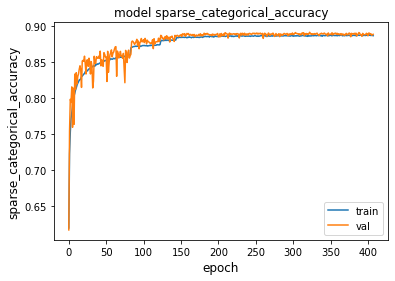

In [12]:

metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

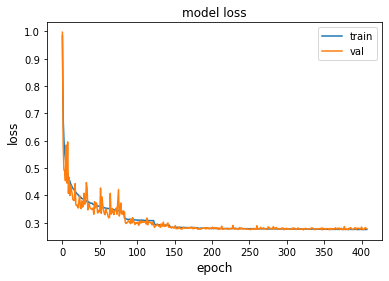

In [13]:
metric1 = "loss"
plt.figure()
plt.plot(history.history[metric1])
plt.plot(history.history["val_" + metric1])
plt.title("model " + metric1)
plt.ylabel(metric1, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [14]:
y_pred=model.predict(test_x)
res=[]
for i in y_pred:
  res.append(np.argmax(i))
print(res)
     

[11, 6, 7, 24, 4, 12, 8, 18, 14, 15, 14, 5, 16, 18, 13, 16, 18, 27, 5, 15, 6, 7, 26, 18, 28, 26, 28, 11, 11, 25, 11, 30, 18, 27, 29, 18, 7, 15, 15, 11, 28, 12, 30, 13, 12, 11, 13, 18, 27, 11, 26, 13, 30, 17, 25, 25, 16, 13, 13, 29, 15, 26, 20, 22, 16, 16, 28, 25, 6, 21, 27, 6, 7, 17, 26, 13, 24, 26, 18, 14, 14, 9, 16, 18, 6, 12, 29, 25, 13, 28, 7, 22, 14, 30, 6, 13, 30, 15, 26, 20, 18, 12, 7, 11, 12, 30, 28, 25, 29, 6, 22, 18, 23, 26, 26, 29, 18, 25, 7, 7, 30, 16, 6, 14, 12, 28, 25, 17, 13, 6, 29, 6, 16, 4, 12, 11, 25, 6, 26, 9, 3, 30, 25, 25, 30, 13, 29, 6, 28, 17, 24, 9, 14, 17, 12, 16, 30, 25, 29, 29, 25, 12, 6, 17, 10, 25, 27, 26, 25, 3, 30, 14, 26, 26, 10, 30, 18, 26, 18, 13, 25, 17, 6, 18, 14, 26, 28, 14, 12, 30, 11, 21, 16, 17, 9, 18, 6, 26, 18, 17, 6, 12, 11, 13, 23, 13, 29, 30, 16, 7, 18, 24, 7, 28, 25, 24, 17, 23, 26, 7, 10, 29, 14, 25, 25, 18, 12, 6, 6, 18, 17, 17, 28, 14, 6, 29, 22, 26, 30, 14, 28, 14, 21, 11, 15, 4, 11, 25, 20, 11, 6, 30, 14, 25, 26, 12, 26, 4, 13, 30, 25,

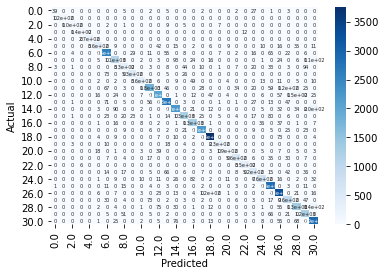

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
data = confusion_matrix(test_y, res)
df_cm = pd.DataFrame(data, columns=np.unique(test_y), index = np.unique(test_y))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 5})# font size

In [16]:

confusion_mat=np.array(data)
as1=pd.DataFrame(confusion_mat)
as1.to_excel('c_mat_local_9a_2.xlsx')